In [39]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np
from sklearn.metrics         import confusion_matrix
from sklearn.metrics         import accuracy_score
from sklearn.metrics         import accuracy_score
from sklearn.preprocessing   import StandardScaler

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

from sklearn.neighbors import KNeighborsClassifier

In [40]:
df = pd.read_csv("C:/Users/ISD/Python_ali/fault_detection/Pv_Data2.csv")
df;
X = df.drop(['Target'],axis=1).values

Y=df.loc[:,'Target']
X.shape

(1600, 7)

In [41]:
trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.2,random_state=42)

In [42]:
sc=StandardScaler()

scaler = sc.fit(trainX)
trainX = scaler.transform(trainX)
testX = scaler.transform(testX)

In [43]:
model = KNeighborsClassifier(n_neighbors=2)
model.fit(trainX,trainY);

In [44]:
ypred=model.predict(trainX)

In [45]:
c=accuracy_score(trainY,ypred)*100
c

93.75

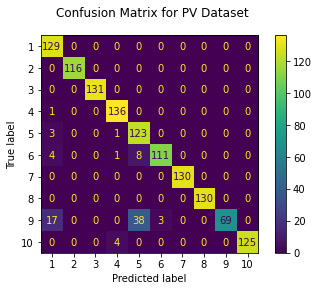

In [46]:
fig = plot_confusion_matrix(model,trainX,trainY, display_labels=model.classes_)
fig.figure_.suptitle("Confusion Matrix for PV Dataset")
plt.show()

In [47]:
ypred1=model.predict(testX)

In [48]:
c=accuracy_score(testY,ypred1)*100
c

79.0625

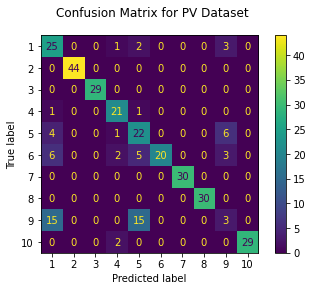

In [49]:
fig = plot_confusion_matrix(model,testX,testY, display_labels=model.classes_)
fig.figure_.suptitle("Confusion Matrix for PV Dataset")
plt.show()

In [50]:
YR=np.concatenate((trainY,testY),axis=0)

In [51]:
YP = np.concatenate((ypred,ypred1), axis=0)

In [52]:
ac2=accuracy_score(YR,YP)*100
ac2

90.8125

In [53]:
c2=confusion_matrix(YR,YP)
c2

array([[154,   0,   0,   1,   2,   0,   0,   0,   3,   0],
       [  0, 160,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 160,   0,   0,   0,   0,   0,   0,   0],
       [  2,   0,   0, 157,   1,   0,   0,   0,   0,   0],
       [  7,   0,   0,   2, 145,   0,   0,   0,   6,   0],
       [ 10,   0,   0,   3,  13, 131,   0,   0,   3,   0],
       [  0,   0,   0,   0,   0,   0, 160,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 160,   0,   0],
       [ 32,   0,   0,   0,  53,   3,   0,   0,  72,   0],
       [  0,   0,   0,   6,   0,   0,   0,   0,   0, 154]], dtype=int64)